In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn import tree

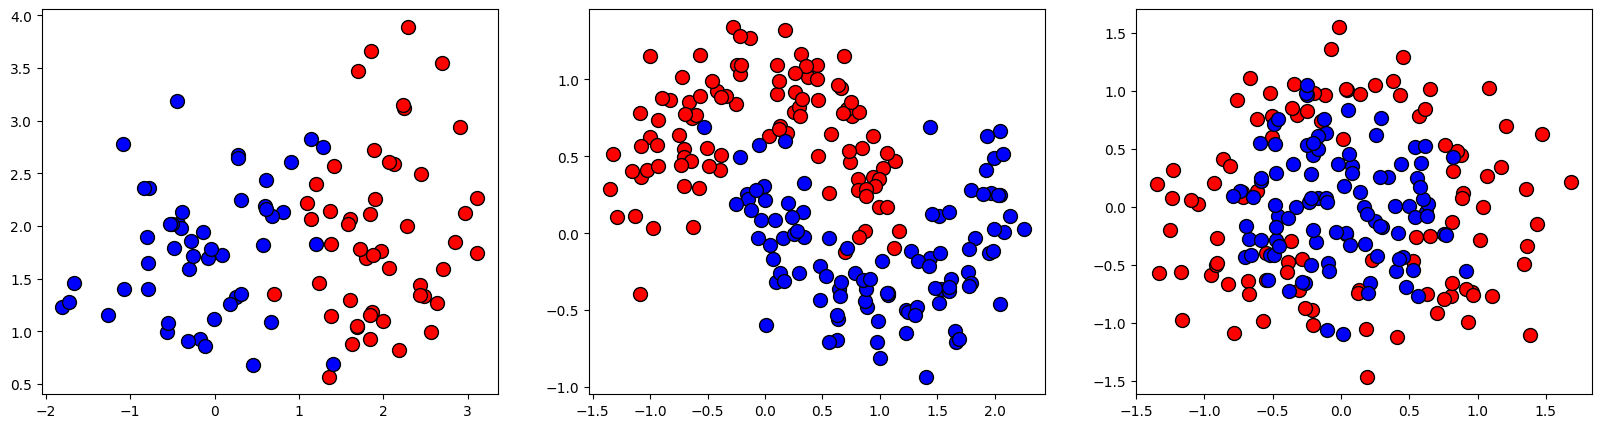

In [2]:
plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1)
            ]
fig, ax = plt.subplots(1, 3, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)
dataset = datasets[1]

In [3]:
def plot_tree(clf, X, y):
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, color in zip([-1,1], plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color)
    plt.show()

In [4]:
class My_stump:
    def __init__(self):
        self.feature_index = None
        self.threshold_value = None
        self.class_below = None
        self.class_above = None
        self.minimum_gini = None

    def get_threshold(self):
        return self.threshold_value

    def get_best_parameters(self):
        return self.feature_index, self.threshold_value, self.minimum_gini

    def calculate_gini_impurity(self, left_zeros, left_ones, right_zeros, right_ones):
        total_left = left_zeros + left_ones
        total_right = right_zeros + right_ones
        total_samples = total_left + total_right

        gini_left = 1 - (left_zeros / total_left) ** 2 - (left_ones / total_left) ** 2
        gini_right = 1 - (right_zeros / total_right) ** 2 - (right_ones / total_right) ** 2
        overall_gini = (total_left / total_samples) * gini_left + (total_right / total_samples) * gini_right

        return overall_gini

    def fit(self, features, labels, weights=None):
        num_samples, num_features = features.shape
        self.minimum_gini = np.inf

        for feature_index in range(num_features):
            sorted_indices = np.argsort(features[:, feature_index])
            thresholds = (features[sorted_indices[:-1], feature_index] + features[sorted_indices[1:], feature_index]) / 2

            total_zeros = np.sum(labels == -1)
            total_ones = np.sum(labels == 1)

            left_zeros = 0
            left_ones = 0
            right_zeros = total_zeros
            right_ones = total_ones

            for j in range(len(thresholds)):
                if weights is None:
                    if labels[sorted_indices[j]] == -1:
                        left_zeros += 1
                        right_zeros -= 1
                    else:
                        left_ones += 1
                        right_ones -= 1
                else:
                    if labels[sorted_indices[j]] == -1:
                        left_zeros += weights[sorted_indices[j]]
                        right_zeros -= weights[sorted_indices[j]]
                    else:
                        left_ones += weights[sorted_indices[j]]
                        right_ones -= weights[sorted_indices[j]]

                gini = self.calculate_gini_impurity(left_zeros, left_ones, right_zeros, right_ones)
                if gini < self.minimum_gini:
                    self.minimum_gini = gini
                    self.feature_index = feature_index
                    self.threshold_value = thresholds[j]
                    self.class_below = -1 if left_zeros > left_ones else 1
                    self.class_above = -1 if right_zeros > right_ones else 1

    def predict(self, features):
        num_samples = features.shape[0]
        predictions = []
        for i in range(num_samples):
            if features[i, self.feature_index] < self.threshold_value:
                predictions.append(self.class_below)
            else:
                predictions.append(self.class_above)

        return np.array(predictions)

In [5]:
dataset = datasets[1]
X = dataset[0]
y = dataset[1]*2-1
w = np.ones(len(X))

my_stump = My_stump()
my_stump.fit(X, y, w)
my_stump.predict(X)

array([-1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
        1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
        1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1])

Difference in the best threshold: -2.9161397741006567e-09


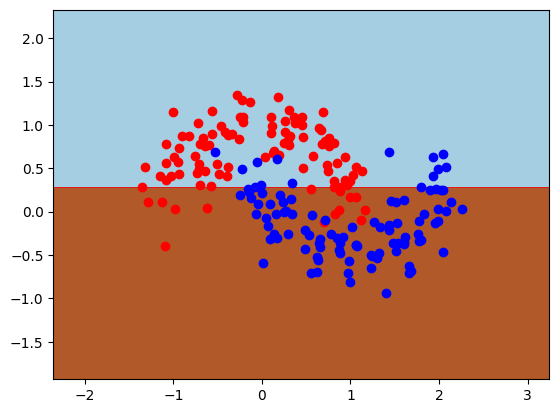

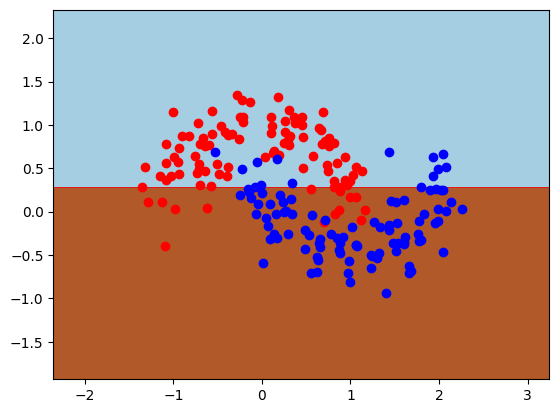

In [6]:
# Check your code
sk_stump = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
my_stump = My_stump()
my_stump.fit(X, y, w)

print("Difference in the best threshold:", sk_stump.tree_.threshold[0] -  my_stump.get_threshold())

plot_tree(my_stump,X,y)
plot_tree(sk_stump,X,y)

## Second part: Adaboost



In [7]:
# Compute the error rate of a weak classifier with weights w_m
def compute_error(y, y_pred, w_m):
    diff_indices = np.where(y != y_pred)[0]
    return w_m[diff_indices].sum()

# Compute alpha
def compute_alpha(error):
    return 0.5 * np.log((1-error)/error)

# Compute the update of the weights
def update_weights(w_i, alpha, y, y_pred, error):
    return w_i * np.exp(-alpha * y * y_pred) / (2 * np.sqrt(error * (1-error)))


class AdaBoost:
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.loss_ensemble = []

    def predict(self, X):
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M))
        for m in range(len(self.G_M)):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m
        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)
        return y_pred.values

    def fit(self, X, y, M = 20):
        self.alphas = []
        self.training_errors = []
        self.M = M
        Z=1
        for m in range(0, M):# Iterate over M weak classifiers
            if m == 0:
                w_m = np.ones(len(y)) * 1 / len(y)
            else:
                w_m = update_weights(w_m, alpha_m, y, y_pred, error_m)

            G_m = My_stump() # Initialize a weak classifier
            G_m.fit(X, y, w_m) # Fit the weak classifier
            y_pred = G_m.predict(X) # Predict with the weak classifier
            error_m = compute_error(y, y_pred, w_m) # Compute the error rate
            alpha_m = compute_alpha(error_m) # Compute the alpha

            self.G_M.append(G_m) # Save to list of weak classifiers
            self.alphas.append(alpha_m)
            Z = Z * (2 * np.sqrt(error_m * (1 - error_m)))
            self.loss_ensemble.append(Z)

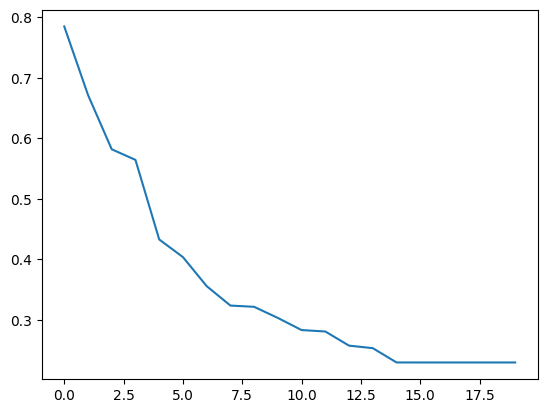

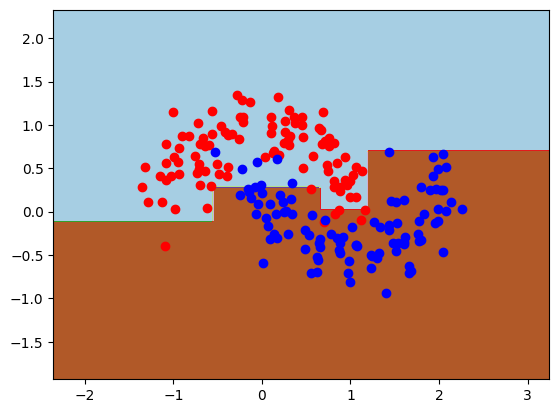

In [8]:
from sklearn.tree import DecisionTreeClassifier

ab = AdaBoost()
ab.fit(X, y, M = 20)
plt.plot(ab.loss_ensemble)
plt.show()
plot_tree(ab, X, y)